In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4462,ham,He said i look pretty wif long hair wat. But i...,NaN,NaN,NaN
4919,ham,"G says you never answer your texts, confirm/deny",NaN,NaN,NaN
2166,ham,"Thank you. And by the way, I just lost.",NaN,NaN,NaN
3687,ham,I'll meet you in the lobby,NaN,NaN,NaN
2741,spam,I don't know u and u don't know me. Send CHAT ...,NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
5119,ham,Lol for real. She told my dad I have cancer
4223,ham,Double eviction this week - Spiral and Michael...
46,ham,Didn't you get hep b immunisation in nigeria.
1656,ham,Yes I posted a couple of pics on fb. There's s...
3628,ham,Should I head straight there or what


In [9]:
#renaming columns

df.rename(columns={'v1':'target' , 'v2': 'Input Text'},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [11]:
df['target']= en.fit_transform(df['target'])

In [12]:
df.head()

,target,Input Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x219093134d0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

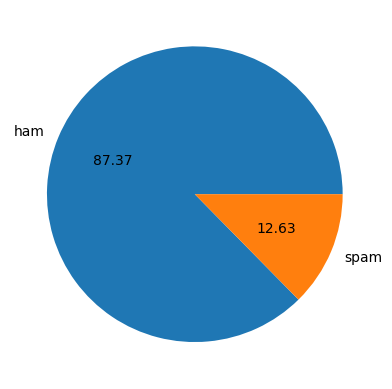

In [17]:
plt.pie(df['target'].value_counts() , labels = ['ham','spam'] , autopct = '%0.2f')

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_char'] = df['Input Text'].apply(len)

In [22]:
df.head()

,target,Input Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
#num of words
df['Input Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Input Text, Length: 5169, dtype: int64

In [25]:
df['words'] = df['Input Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# breaks my sms into words

In [26]:
df.head()

,target,Input Text,num_char,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['Input Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# breaks my sms into sentences

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Input Text, Length: 5169, dtype: int64

In [28]:
df['num_sentences'] = df['Input Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,Input Text,num_char,words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_char','words','num_sentences']].describe()

,num_char,words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 0][['num_char','words','num_sentences']].describe()

,num_char,words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 1][['num_char','words','num_sentences']].describe()

,num_char,words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

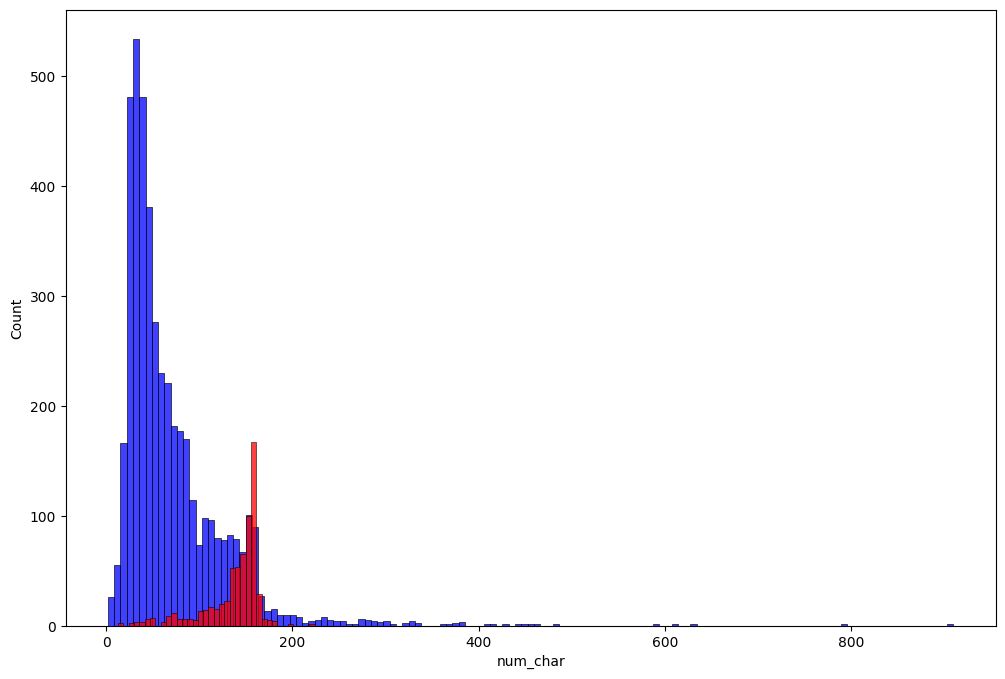

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_char'],color='blue')
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

<Axes: xlabel='words', ylabel='Count'>

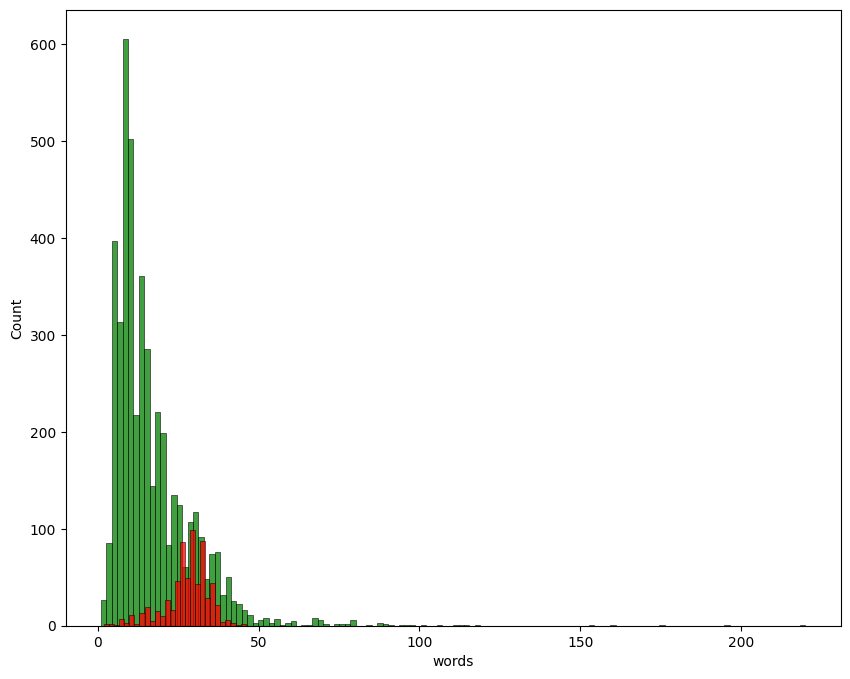

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['target'] == 0]['words'],color='green')
sns.histplot(df[df['target'] == 1]['words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

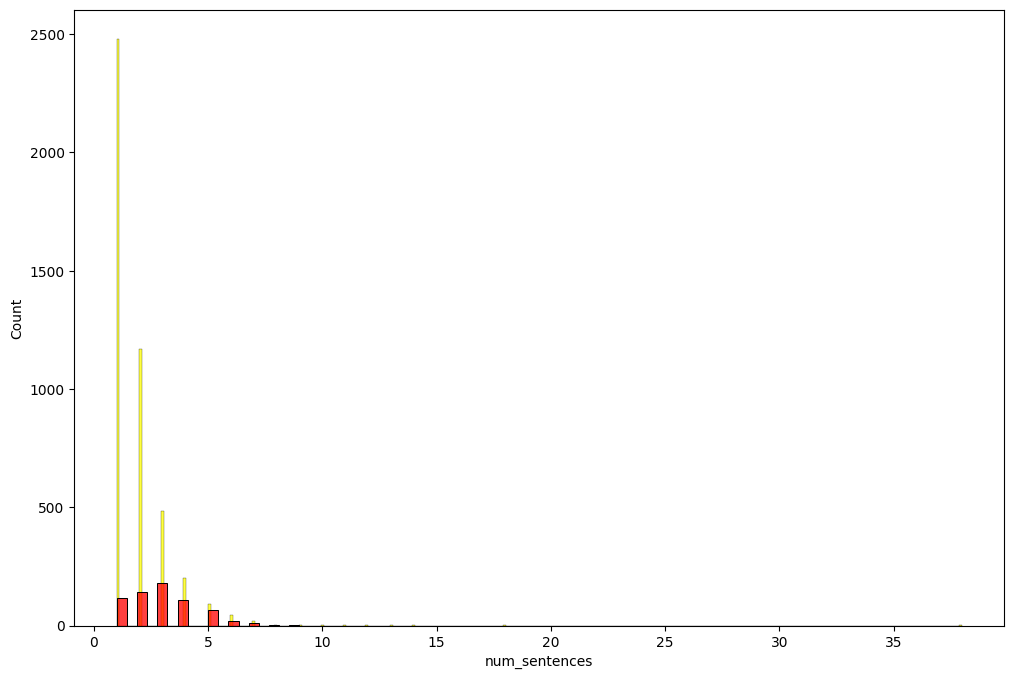

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='yellow')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

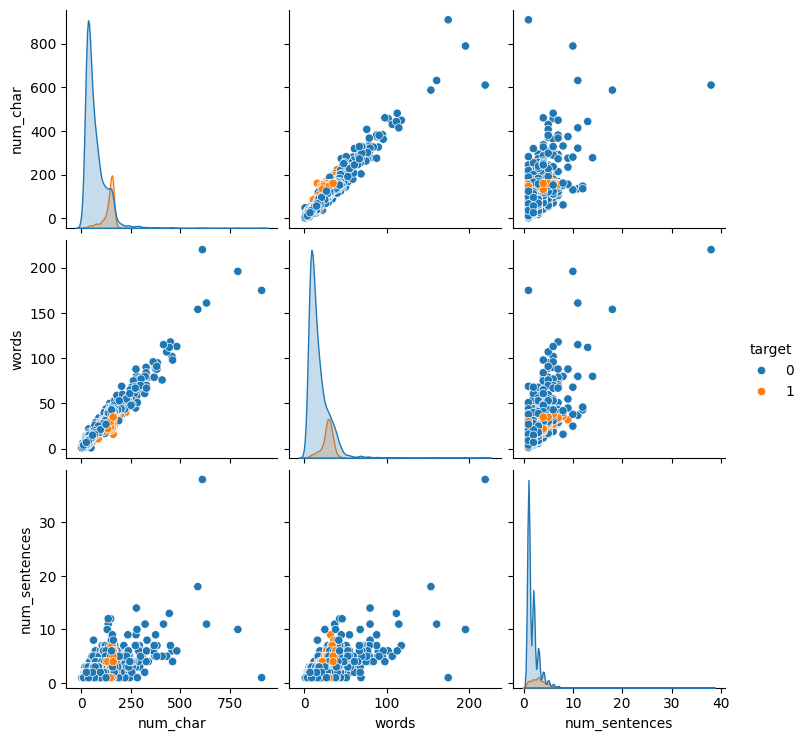

In [36]:
sns.pairplot(df,hue='target')

In [37]:
df.head()

,target,Input Text,num_char,words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

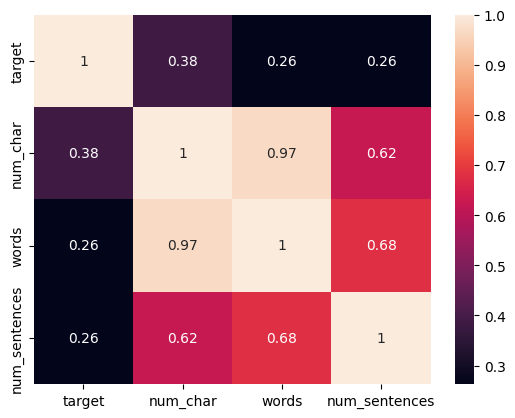

In [38]:
sns.heatmap(df[['target','num_char','words','num_sentences']].corr(),annot=True)

In [39]:
import re
import string
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
ps = PorterStemmer()

In [41]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [42]:
# wordsas('loved the yt lectures on machine learning.how are you?')

In [43]:
df.head()

,target,Input Text,num_char,words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
def wordsas(text):
    text = text.lower()  # Convert text to lowercase  
    #text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    #text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Replace newlines with space
    #text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    tokens = nltk.word_tokenize(text)  # Tokenize the text

    # Remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]

    # Apply stemming
    stemmed_tokens = [ps.stem(word) for word in filtered_tokens]

    return " ".join(stemmed_tokens)  # Return cleaned text as a string

In [45]:
df['Input Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [46]:
wordsas('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
df['Input Text'].apply(wordsas)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Input Text, Length: 5169, dtype: object

In [48]:
df['clean_text'] = df['Input Text'].apply(wordsas)

In [49]:
df.head()

,target,Input Text,num_char,words,num_sentences,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [50]:
!pip install WordCloud

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=12,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=" "))         

<Figure size 1200x800 with 0 Axes>

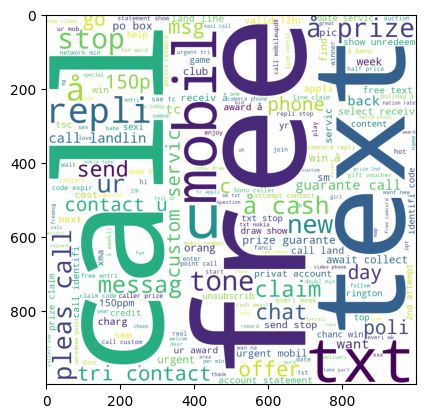

<Figure size 1200x800 with 0 Axes>

In [53]:
plt.imshow(spam_wc)
plt.figure(figsize=(12,8))

In [54]:
non_spam_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=" ")) 

<Figure size 1200x800 with 0 Axes>

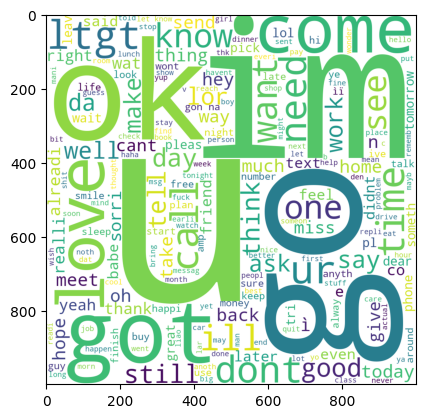

<Figure size 1200x800 with 0 Axes>

In [55]:
plt.imshow(non_spam_wc)
plt.figure(figsize=(12,8))

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

10816

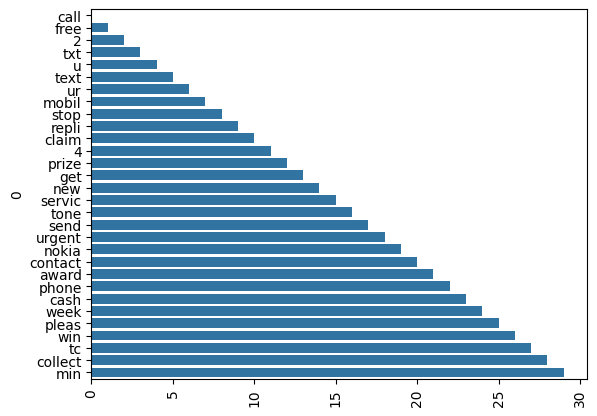

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

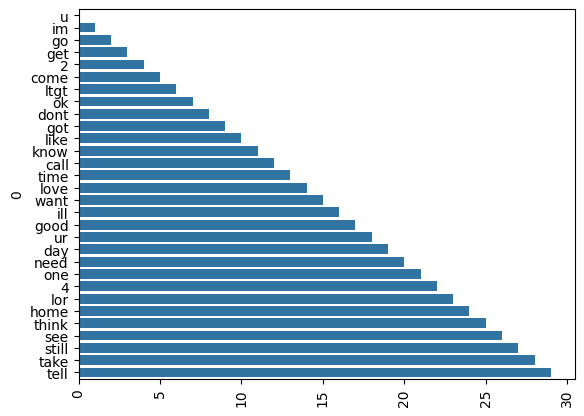

In [60]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## Used CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
X = cv.fit_transform(df['clean_text']).toarray()

In [63]:
X.shape

(5169, 8034)

In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3618, 8034), (1551, 8034), (3618,), (1551,))

## Naive bayes is good for most spam classifications 

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [69]:
classifier = {
    "gnb" : GaussianNB(),
    "mnb" : MultinomialNB(),
    "bnb" : BernoulliNB()
}

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import precision_score , recall_score , f1_score

In [71]:
for name, clf in classifier.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    rep =  classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1_score(y_test,y_pred)}")
    #print('Classification_report : \n \n',rep)
    print('Confusion_matrix :\n',cm)


 =========== gnb ============
Accuracy Score: 0.880722114764668
Precision Score: 0.5504322766570605
Recall Score: 0.8681818181818182
f1_score : 0.673721340388007
Confusion_matrix :
 [[1175  156]
 [  29  191]]

 =========== mnb ============
Accuracy Score: 0.9761444229529336
Precision Score: 0.9140271493212669
Recall Score: 0.9181818181818182
f1_score : 0.9160997732426304
Confusion_matrix :
 [[1312   19]
 [  18  202]]

 =========== bnb ============
Accuracy Score: 0.9664732430689877
Precision Score: 0.9772727272727273
Recall Score: 0.7818181818181819
f1_score : 0.8686868686868687
Confusion_matrix :
 [[1327    4]
 [  48  172]]


In [72]:
'''
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
score_gnb = accuracy_score(y_test,gnb_pred)
gnb_cm = confusion_matrix(y_test,gnb_pred)
rep = classification_report(y_test,gnb_pred)
gnb_precision = precision_score(y_test,gnb_pred)
recall_gnb = recall_score(y_test,gnb_pred)
print('Accuracy score :\n',score_gnb)
print('Precision score :\n', gnb_precision)
print('Recall score :\n',recall_gnb)
print('Classification_report : \n \n',rep)
print('Confusion_matrix :\n',gnb_cm)

'''

"\ngnb.fit(X_train,y_train)\ngnb_pred = gnb.predict(X_test)\nscore_gnb = accuracy_score(y_test,gnb_pred)\ngnb_cm = confusion_matrix(y_test,gnb_pred)\nrep = classification_report(y_test,gnb_pred)\ngnb_precision = precision_score(y_test,gnb_pred)\nrecall_gnb = recall_score(y_test,gnb_pred)\nprint('Accuracy score :\n',score_gnb)\nprint('Precision score :\n', gnb_precision)\nprint('Recall score :\n',recall_gnb)\nprint('Classification_report : \n \n',rep)\nprint('Confusion_matrix :\n',gnb_cm)\n\n"

## Used TfidVectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2)) 
# used without selecting max_features and lastly made a performance_df 

In [74]:
X_new = tfidf.fit_transform(df['clean_text']).toarray()

In [75]:
X_new.shape

(5169, 5000)

In [76]:
pip install imbalanced-learn

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_new_res , y_res = sm.fit_resample(X_new,y)
X_new_res.shape , y_res.shape

((9032, 5000), (9032,))

In [81]:
X_train_new, X_test_new , y_train_new , y_test_new = train_test_split(X_new_res,y_res,test_size = 0.3,random_state=42)

In [82]:
for name, clf in classifier.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train_new,y_train_new)
    y_pred1 = clf.predict(X_test_new)
    score = accuracy_score(y_test_new,y_pred1)
    precision = precision_score(y_test_new,y_pred1)
    recall = recall_score(y_test_new,y_pred1)
    rep =  classification_report(y_test_new,y_pred1)
    cm = confusion_matrix(y_test_new,y_pred1)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1_score(y_test_new,y_pred1)}")
    #print('Classification_report : \n \n',rep)
    print('Confusion_matrix :\n',cm)


 =========== gnb ============
Accuracy Score: 0.9542435424354243
Precision Score: 0.916385704652731
Recall Score: 1.0
f1_score : 0.956368754398311
Confusion_matrix :
 [[1227  124]
 [   0 1359]]

 =========== mnb ============
Accuracy Score: 0.9708487084870848
Precision Score: 0.9761904761904762
Recall Score: 0.9654157468727005
f1_score : 0.9707732149463559
Confusion_matrix :
 [[1319   32]
 [  47 1312]]

 =========== bnb ============
Accuracy Score: 0.9638376383763838
Precision Score: 0.9992082343626286
Recall Score: 0.9286239882266373
f1_score : 0.9626239511823036
Confusion_matrix :
 [[1350    1]
 [  97 1262]]


## testing other classification models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=21)
bc = BaggingClassifier(n_estimators=50, random_state=12)
etc = ExtraTreesClassifier(n_estimators=50, random_state=24)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=58)
mnb = MultinomialNB()

In [85]:
all_clfs = {
    'SVC' : svc,
    'NB' : mnb,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [86]:
accuracy_scores_new = []
precision_scores_new = []
recall_scores_new = []
f1_scores_new = []

for name, clf in all_clfs.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train_new,y_train_new)
    y_pred1 = clf.predict(X_test_new)
    score = accuracy_score(y_test_new,y_pred1)
    precision = precision_score(y_test_new,y_pred1)
    recall = recall_score(y_test_new,y_pred1)
    rep =  classification_report(y_test_new,y_pred1)
    cm = confusion_matrix(y_test_new,y_pred1)
    f1 = f1_score(y_test_new,y_pred1)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1}")
    #print('Classification_report : \n \n',rep)
    print('Confusion_matrix :\n',cm)
    accuracy_scores_new.append(score)
    precision_scores_new.append(precision)
    recall_scores_new.append(recall)
    f1_scores_new.append(f1)


 =========== SVC ============
Accuracy Score: 0.9686346863468634
Precision Score: 0.9479606188466948
Recall Score: 0.9919058130978661
f1_score : 0.9694354548723481
Confusion_matrix :
 [[1277   74]
 [  11 1348]]

 =========== NB ============
Accuracy Score: 0.9708487084870848
Precision Score: 0.9761904761904762
Recall Score: 0.9654157468727005
f1_score : 0.9707732149463559
Confusion_matrix :
 [[1319   32]
 [  47 1312]]

 =========== KN ============
Accuracy Score: 0.6287822878228783
Precision Score: 0.5757185757185758
Recall Score: 0.9874908020603385
f1_score : 0.7273712737127371
Confusion_matrix :
 [[ 362  989]
 [  17 1342]]

 =========== DT ============
Accuracy Score: 0.8907749077490775
Precision Score: 0.9345870809484873
Recall Score: 0.8410596026490066
f1_score : 0.8853601859024013
Confusion_matrix :
 [[1271   80]
 [ 216 1143]]

 =========== LR ============
Accuracy Score: 0.9416974169741698
Precision Score: 0.9573495811119573
Recall Score: 0.9249448123620309
f1_score : 0.94086826

In [87]:
performance_df = pd.DataFrame({'Algorithms' : all_clfs.keys() ,
                               'Accuracy_new' : accuracy_scores_new,
                               'Precision_new': precision_scores_new,
                               'Recall_new': recall_scores_new,
                               'F1_new': f1_scores_new}).sort_values('Precision_new',ascending=False)

In [88]:
performance_df

,Algorithms,Accuracy_new,Precision_new,Recall_new,F1_new
5,RF,0.989668,0.991870,0.987491,0.989676
8,ETC,0.988930,0.984683,0.993377,0.989011
10,xgb,0.965314,0.978804,0.951435,0.964925
1,NB,0.970849,0.976190,0.965416,0.970773
4,LR,0.941697,0.957350,0.924945,0.940868
7,BgC,0.967159,0.951636,0.984547,0.967812
0,SVC,0.968635,0.947961,0.991906,0.969435
9,GBDT,0.928782,0.947773,0.908021,0.927471
6,AdaBoost,0.874539,0.937339,0.803532,0.865293
3,DT,0.890775,0.934587,0.841060,0.885360


In [89]:
old_one = pd.read_csv('model_performance_old.csv')

In [90]:
old_one

,Algorithms,Accuracy,Precision,Recall,F1
0,KN,0.923275,1.000000,0.335196,0.502092
1,RF,0.978723,1.000000,0.815642,0.898462
2,ETC,0.974855,0.948718,0.826816,0.883582
3,SVC,0.974855,0.932099,0.843575,0.885630
4,GBDT,0.956802,0.930769,0.675978,0.783172
5,xgb,0.968407,0.927632,0.787709,0.851964
6,LR,0.957447,0.895105,0.715084,0.795031
7,BgC,0.963894,0.855491,0.826816,0.840909
8,AdaBoost,0.936815,0.818898,0.581006,0.679739
9,DT,0.940039,0.790541,0.653631,0.715596


In [91]:
final_df = pd.merge(old_one, performance_df , on="Algorithms" ,how ="inner")
# using pd.concat here wont match the indexes of the algorithms. SO use merge

In [92]:
final_df

,Algorithms,Accuracy,Precision,Recall,F1,Accuracy_new,Precision_new,Recall_new,F1_new
0,KN,0.923275,1.000000,0.335196,0.502092,0.628782,0.575719,0.987491,0.727371
1,RF,0.978723,1.000000,0.815642,0.898462,0.989668,0.991870,0.987491,0.989676
2,ETC,0.974855,0.948718,0.826816,0.883582,0.988930,0.984683,0.993377,0.989011
3,SVC,0.974855,0.932099,0.843575,0.885630,0.968635,0.947961,0.991906,0.969435
4,GBDT,0.956802,0.930769,0.675978,0.783172,0.928782,0.947773,0.908021,0.927471
5,xgb,0.968407,0.927632,0.787709,0.851964,0.965314,0.978804,0.951435,0.964925
6,LR,0.957447,0.895105,0.715084,0.795031,0.941697,0.957350,0.924945,0.940868
7,BgC,0.963894,0.855491,0.826816,0.840909,0.967159,0.951636,0.984547,0.967812
8,AdaBoost,0.936815,0.818898,0.581006,0.679739,0.874539,0.937339,0.803532,0.865293
9,DT,0.940039,0.790541,0.653631,0.715596,0.890775,0.934587,0.841060,0.885360


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model_etc_new.pkl','wb'))